In [2]:
import pandas as pd

# load data
df = pd.read_csv('/content/traffic-volume-counts-1.csv')

# Display the first few rows
print(df.head(10))


   ID  SegmentID  Roadway Name         From                To Direction  \
0   1      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
1   2      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
2   3      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
3   4      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
4   5      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
5   6      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
6   7      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        SB   
7   8      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        SB   
8   9      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        SB   
9  10      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        SB   

         Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  2:00-3:00PM  \
0  01/09/2012           20.0         10.0         11.0  ...        104.0   
1  01/10/2012         

In [3]:
# Get a summary
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42756 entries, 0 to 42755
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             42756 non-null  int64  
 1   SegmentID      42756 non-null  int64  
 2   Roadway Name   42756 non-null  object 
 3   From           42756 non-null  object 
 4   To             42756 non-null  object 
 5   Direction      42756 non-null  object 
 6   Date           42756 non-null  object 
 7   12:00-1:00 AM  42752 non-null  float64
 8   1:00-2:00AM    42752 non-null  float64
 9   2:00-3:00AM    42752 non-null  float64
 10  3:00-4:00AM    42752 non-null  float64
 11  4:00-5:00AM    42752 non-null  float64
 12  5:00-6:00AM    42752 non-null  float64
 13  6:00-7:00AM    42752 non-null  float64
 14  7:00-8:00AM    42752 non-null  float64
 15  8:00-9:00AM    42752 non-null  float64
 16  9:00-10:00AM   42752 non-null  float64
 17  10:00-11:00AM  42753 non-null  float64
 18  11:00-

In [4]:
# Check for missing values
print(df.isnull().sum())


ID                 0
SegmentID          0
Roadway Name       0
From               0
To                 0
Direction          0
Date               0
12:00-1:00 AM      4
1:00-2:00AM        4
2:00-3:00AM        4
3:00-4:00AM        4
4:00-5:00AM        4
5:00-6:00AM        4
6:00-7:00AM        4
7:00-8:00AM        4
8:00-9:00AM        4
9:00-10:00AM       4
10:00-11:00AM      3
11:00-12:00PM      1
12:00-1:00PM     253
1:00-2:00PM      253
2:00-3:00PM      253
3:00-4:00PM      253
4:00-5:00PM      253
5:00-6:00PM      253
6:00-7:00PM      253
7:00-8:00PM      253
8:00-9:00PM      253
9:00-10:00PM     253
10:00-11:00PM    253
11:00-12:00AM    253
dtype: int64


In [5]:
# Descriptive statistics for numeric columns
print(df.describe())

                 ID     SegmentID  12:00-1:00 AM   1:00-2:00AM   2:00-3:00AM  \
count  42756.000000  4.275600e+04   42752.000000  42752.000000  42752.000000   
mean     302.926841  4.988159e+05     251.448423    178.591504    135.280318   
std      504.422798  1.875303e+06     407.435712    303.030296    242.091877   
min        1.000000  2.020000e+02       0.000000      0.000000      0.000000   
25%       95.000000  3.402700e+04      60.000000     38.000000     26.000000   
50%      193.000000  7.534300e+04     118.000000     79.000000     56.000000   
75%      299.000000  1.448810e+05     241.000000    171.000000    128.000000   
max     3393.000000  9.017050e+06    4805.000000   4489.000000   4818.000000   

        3:00-4:00AM   4:00-5:00AM   5:00-6:00AM  6:00-7:00AM   7:00-8:00AM  \
count  42752.000000  42752.000000  42752.000000  42752.00000  42752.000000   
mean     117.619359    135.677980    206.655747    352.60051    491.184673   
std      215.316979    249.763737    415.6140

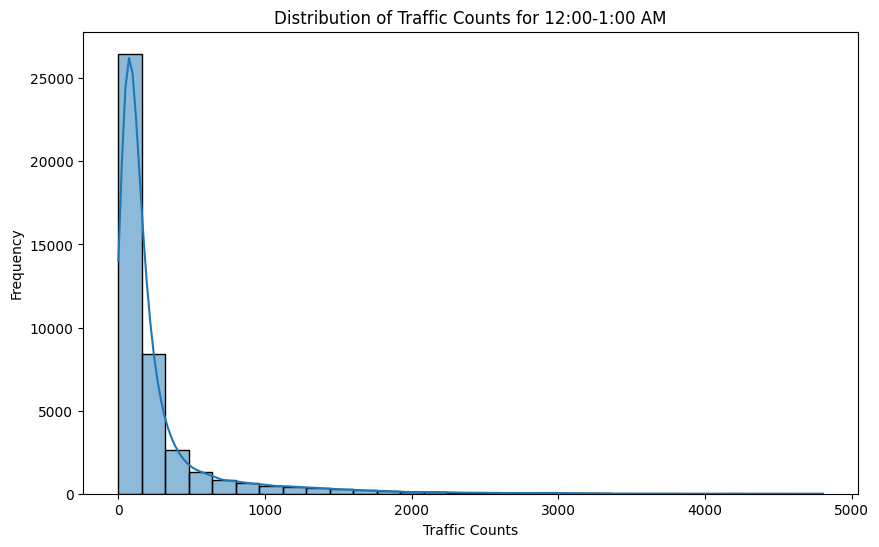

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of traffic counts for a specific time, '12:00-1:00 AM'
plt.figure(figsize=(10, 6))
sns.histplot(df['12:00-1:00 AM'], bins=30, kde=True)
plt.title('Distribution of Traffic Counts for 12:00-1:00 AM')
plt.xlabel('Traffic Counts')
plt.ylabel('Frequency')
plt.show()


In [7]:
df['Total Daily Traffic'] = df.filter(regex='AM|PM').sum(axis=1)

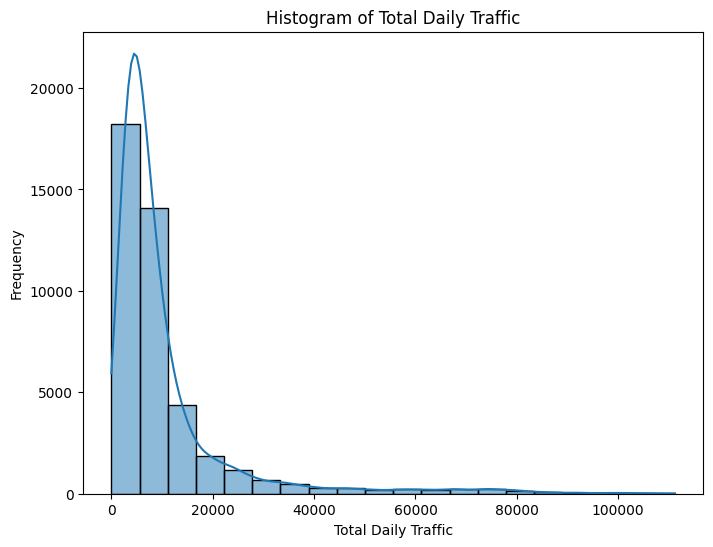

In [8]:
# Histogram of Total Daily Traffic
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Daily Traffic'], bins=20, kde=True)
plt.title('Histogram of Total Daily Traffic')
plt.xlabel('Total Daily Traffic')
plt.ylabel('Frequency')
plt.show()


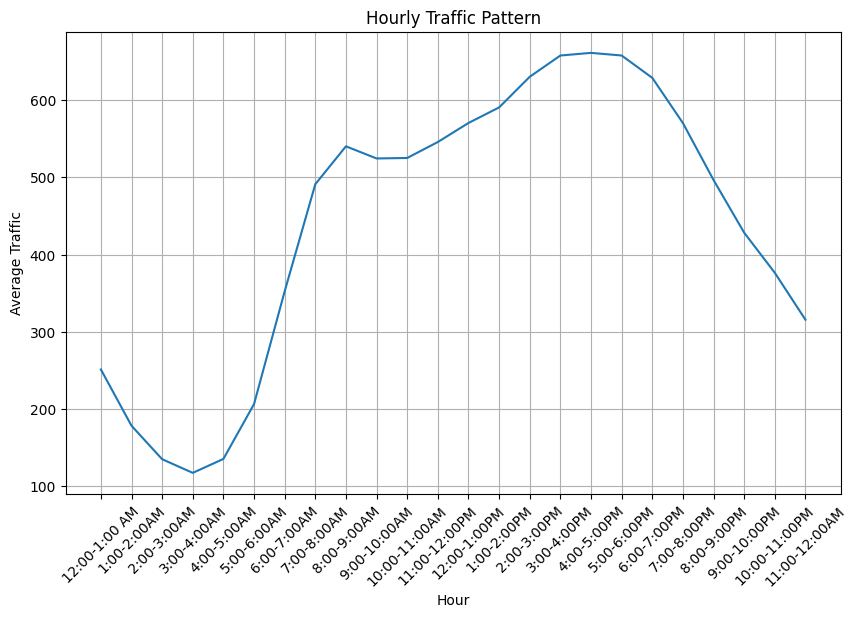

In [9]:

# Line plot of hourly traffic pattern
hourly_columns = [col for col in df.columns if 'AM' in col or 'PM' in col]
hourly_traffic = df[hourly_columns].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values)
plt.title('Hourly Traffic Pattern')
plt.xlabel('Hour')
plt.ylabel('Average Traffic')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


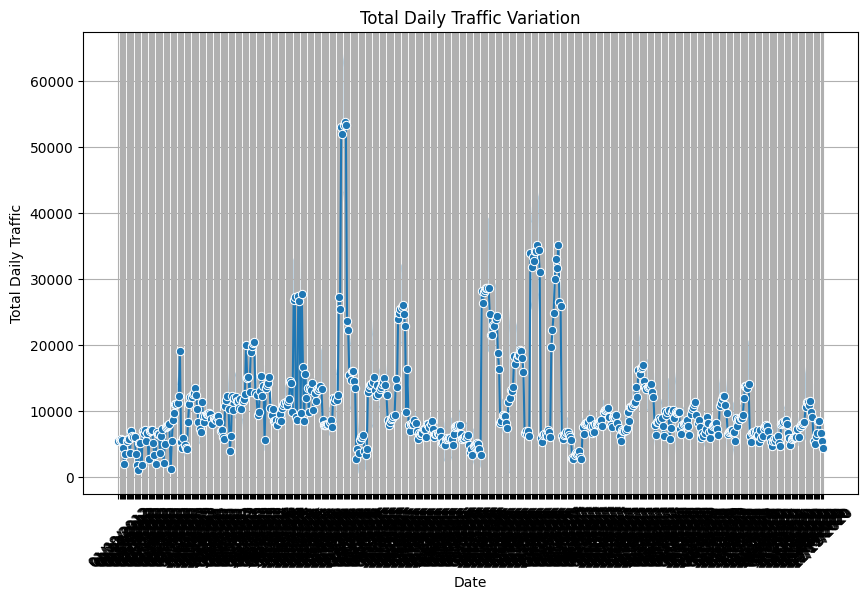

In [10]:
#Plot the total daily traffic variation over different days.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total Daily Traffic', data=df, marker='o')
plt.title('Total Daily Traffic Variation')
plt.xlabel('Date')
plt.ylabel('Total Daily Traffic')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

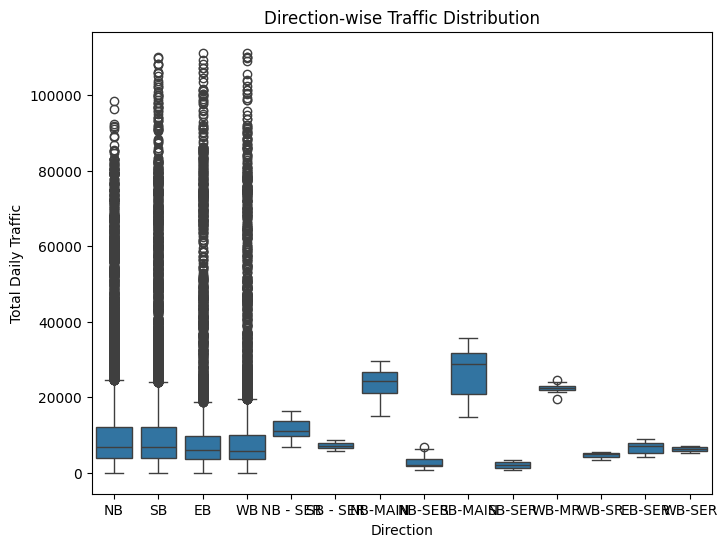

In [12]:
#Visualize the distribution of total daily traffic for different directions.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Direction', y='Total Daily Traffic', data=df)
plt.title('Direction-wise Traffic Distribution')
plt.xlabel('Direction')
plt.ylabel('Total Daily Traffic')
plt.show()


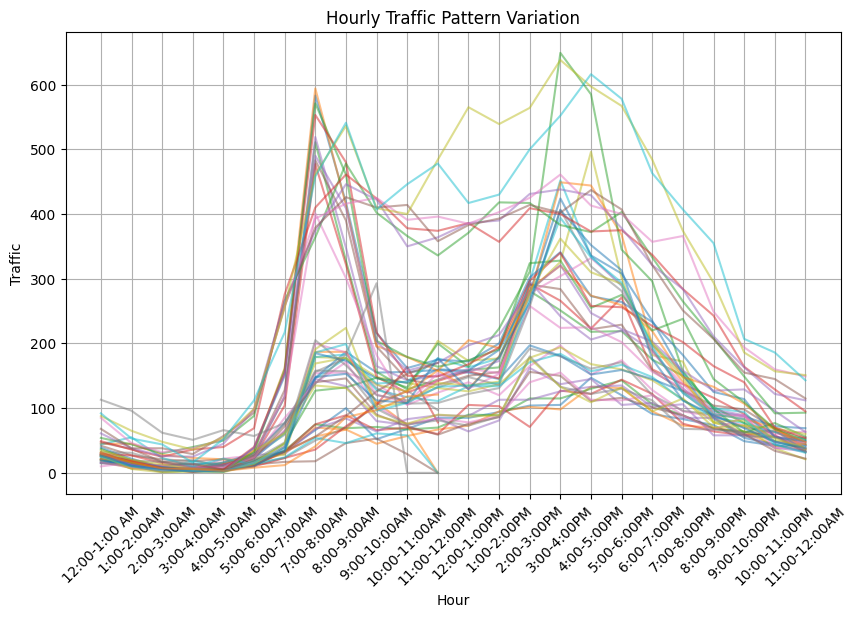

In [13]:
#Plot the hourly traffic pattern for different days. for the first 50 rows
hourly_traffic = df[hourly_columns].mean(axis=0)
plt.figure(figsize=(10, 6))
df_iter = df[:50]
for idx, row in df_iter.iterrows():
    sns.lineplot(x=hourly_traffic.index, y=row[hourly_columns].values, alpha=0.5)


plt.title('Hourly Traffic Pattern Variation')
plt.xlabel('Hour')
plt.ylabel('Traffic')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


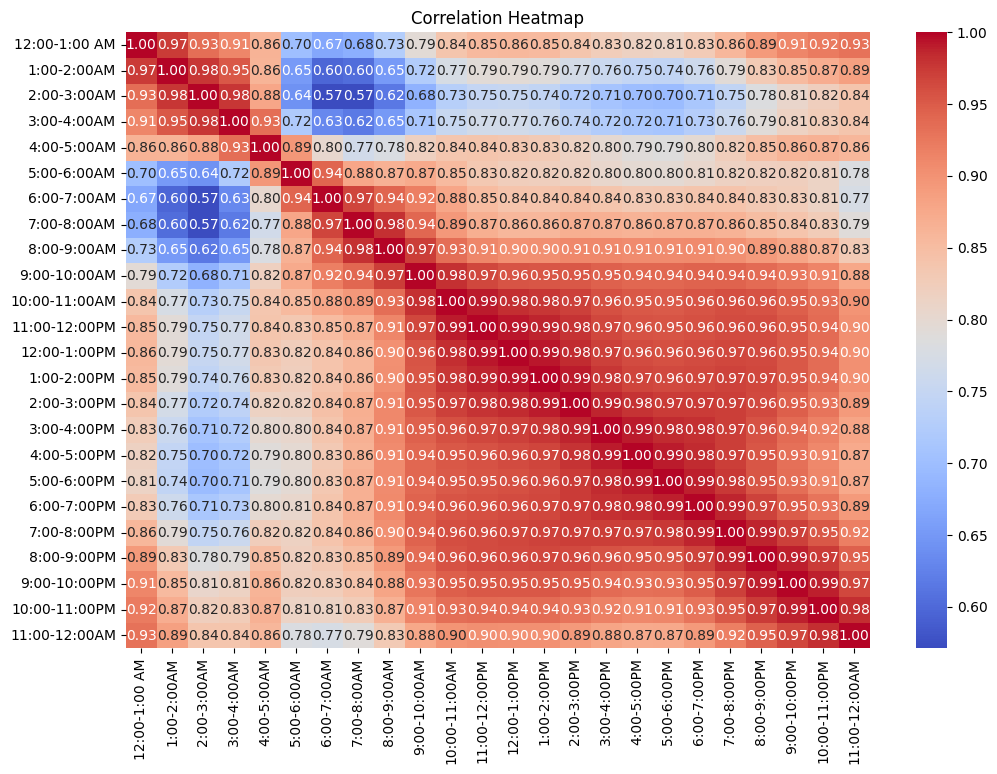

In [14]:
# Explore the correlation between different time intervals.
plt.figure(figsize=(12, 8))
sns.heatmap(df[hourly_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


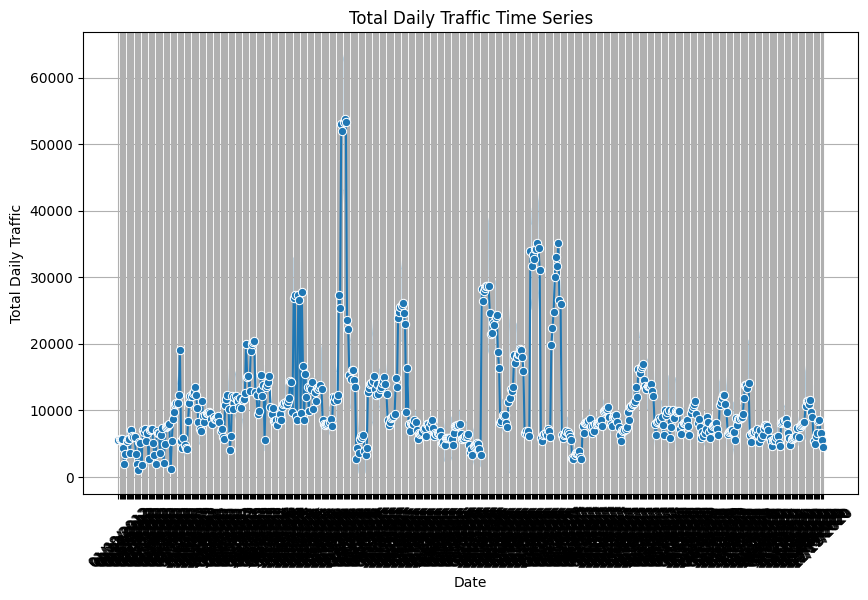

In [15]:
# Plot the time series of total daily traffic.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total Daily Traffic', data=df, marker='o')
plt.title('Total Daily Traffic Time Series')
plt.xlabel('Date')
plt.ylabel('Total Daily Traffic')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


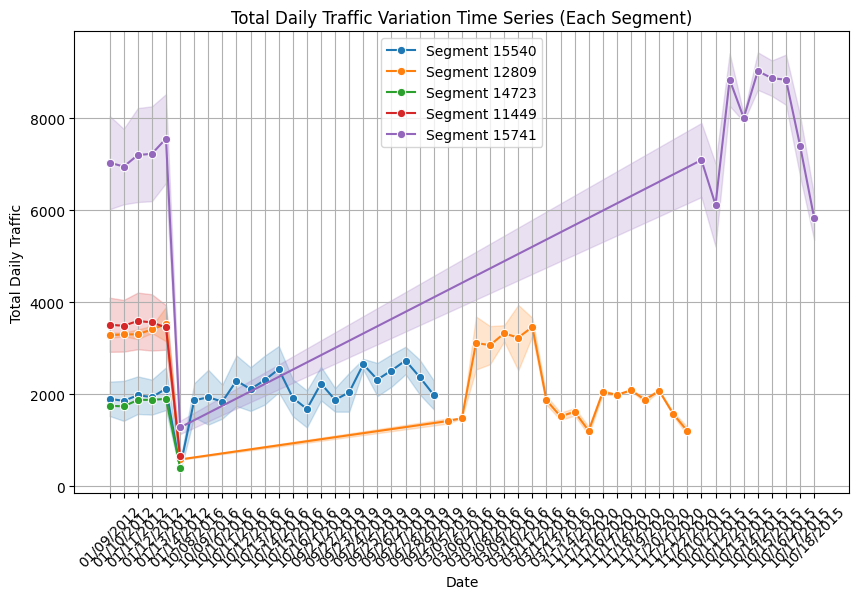

In [16]:
# Plot the time series of total daily traffic for each segment. for top 50
plt.figure(figsize=(10, 6))
df_seg = df[:50]
for segment_id in df_seg['SegmentID'].unique():
    sns.lineplot(x='Date', y='Total Daily Traffic', data=df[df['SegmentID'] == segment_id], marker='o', label=f'Segment {segment_id}')
plt.title('Total Daily Traffic Variation Time Series (Each Segment)')
plt.xlabel('Date')
plt.ylabel('Total Daily Traffic')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-18-c6b72f8915c9>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total Traffic'] = df[traffic_columns].sum(axis=1)


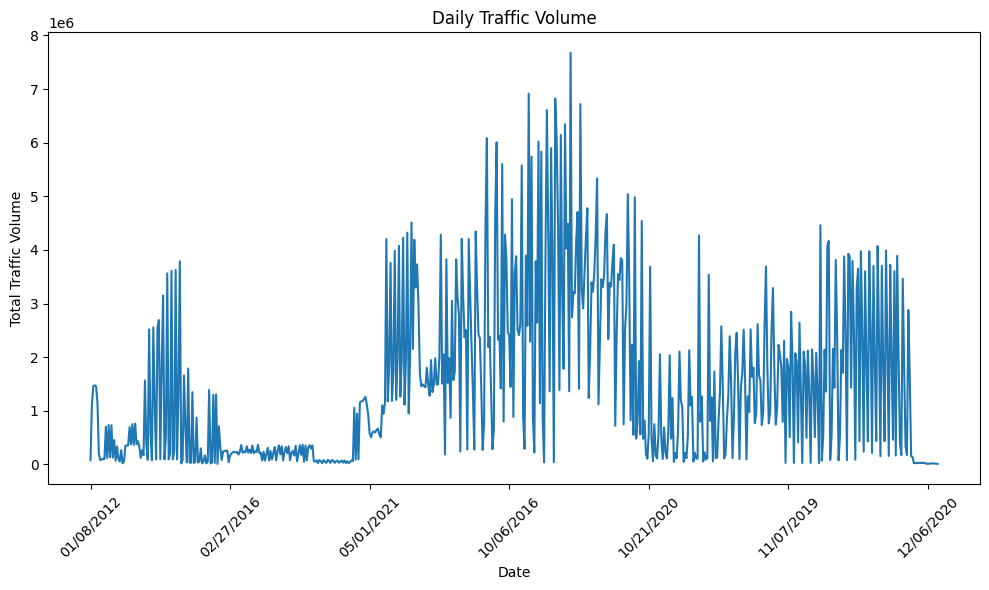

In [18]:
traffic_columns = df.columns[6:]  # Adjust this as needed to match your DataFrame
df['Total Traffic'] = df[traffic_columns].sum(axis=1)

# Aggregate this total traffic by date
daily_traffic = df.groupby('Date')['Total Traffic'].sum()

# Now, let's plot
plt.figure(figsize=(10, 6))
daily_traffic.plot(kind='line')
plt.title('Daily Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Total Traffic Volume')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures everything fits without overlapping
plt.show()


<ipython-input-19-952ebc285f2e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  time_of_day_traffic = df.iloc[:, 6:-1].mean()


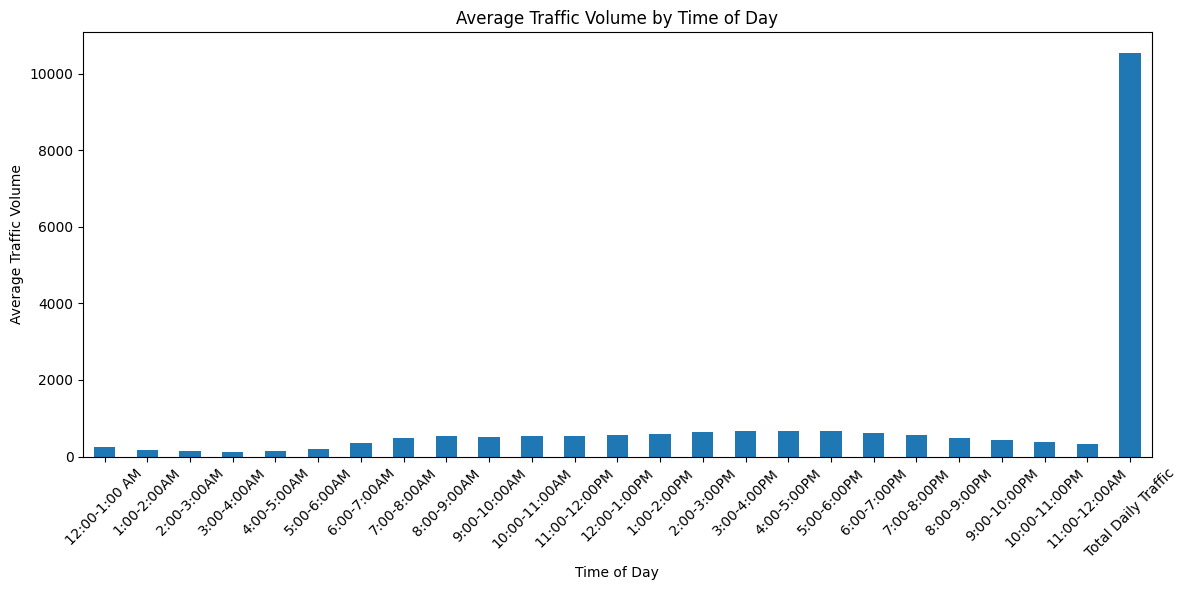

In [19]:
# Traffic volume by time of day
time_of_day_traffic = df.iloc[:, 6:-1].mean()
plt.figure(figsize=(12, 6))
time_of_day_traffic.plot(kind='bar')
plt.title('Average Traffic Volume by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-20-f91aec3a411f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  traffic_by_direction = df.groupby('Direction').sum().iloc[:, 2:-1]


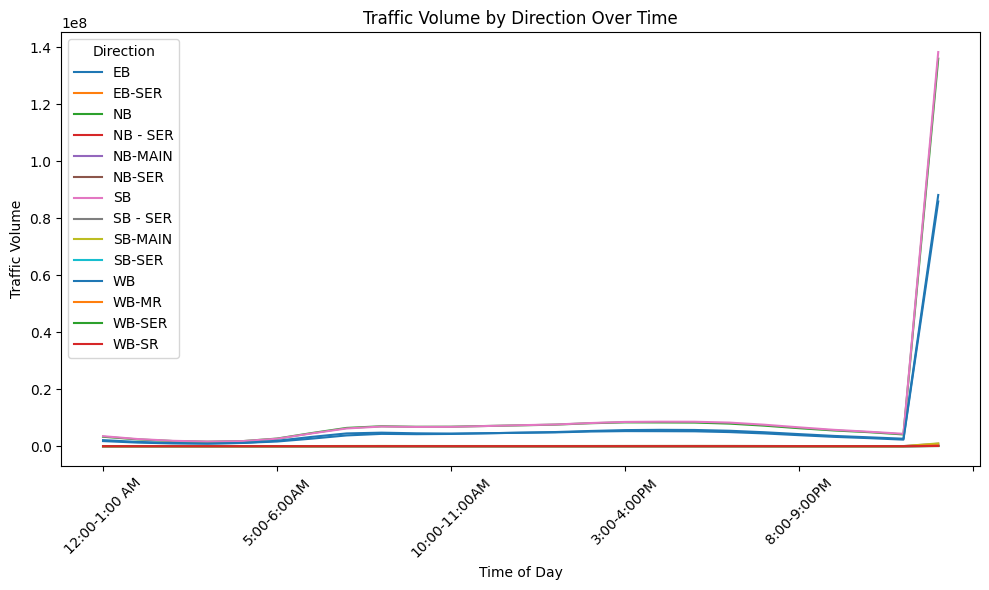

In [20]:

# Comparison of traffic volume by direction
traffic_by_direction = df.groupby('Direction').sum().iloc[:, 2:-1]
traffic_by_direction.T.plot(kind='line', figsize=(10, 6))
plt.title('Traffic Volume by Direction Over Time')
plt.xlabel('Time of Day')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

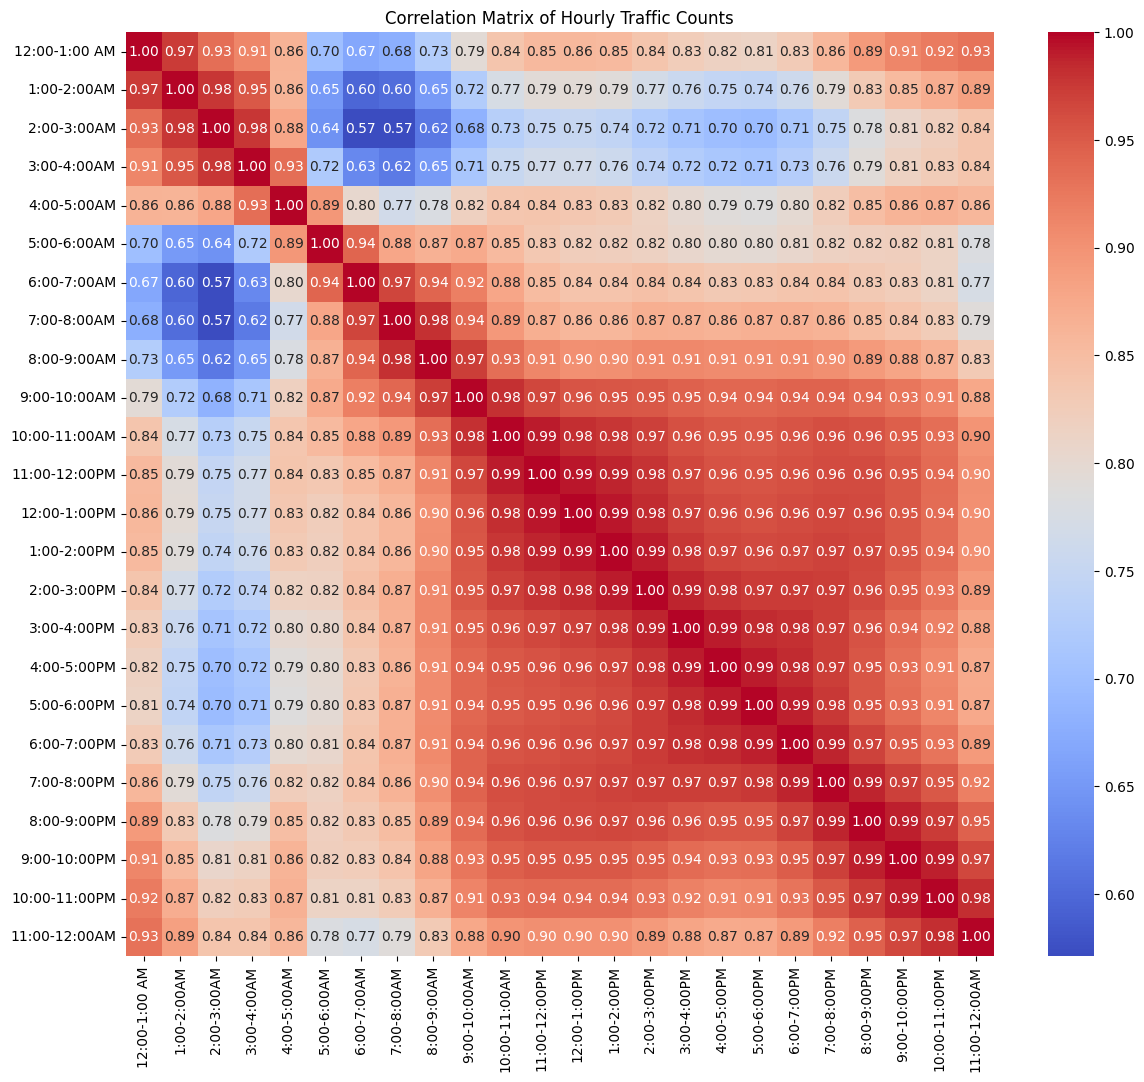

In [23]:
# Correlation matrix of hourly traffic counts
traffic_counts = df.filter(regex='AM|PM')
correlation_matrix = traffic_counts.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Hourly Traffic Counts')
plt.show()


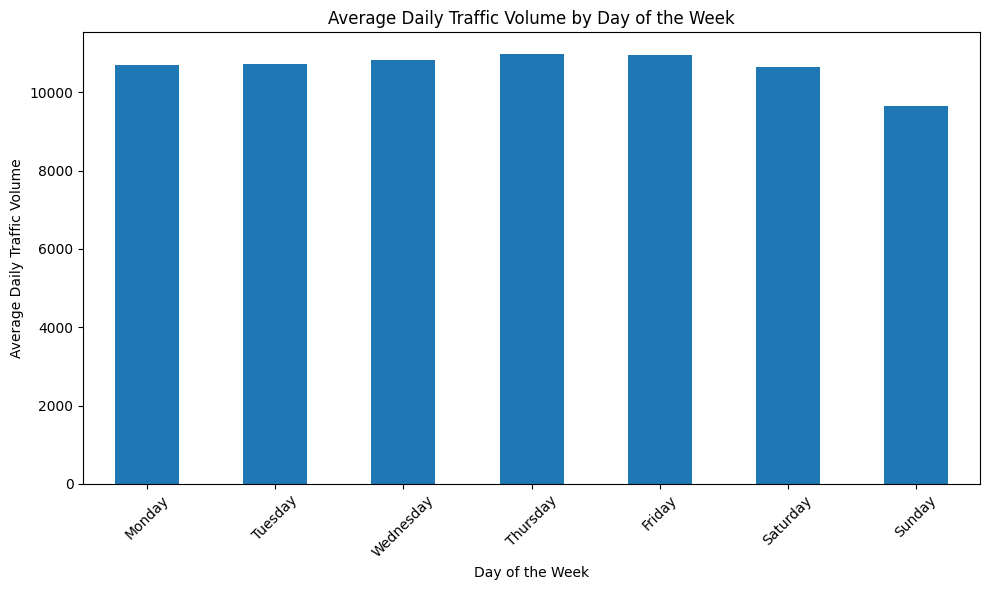

In [27]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Now that 'Date' is definitely a datetime, you can add a 'DayOfWeek' column
df['DayOfWeek'] = df['Date'].dt.day_name()


# Average traffic volume by day of the week
average_traffic_by_dow = df.groupby('DayOfWeek')['Total Daily Traffic'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
average_traffic_by_dow.plot(kind='bar')
plt.title('Average Daily Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Traffic Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
df = pd.read_csv('/content/traffic-volume-counts-1.csv')
df = df[:3].drop(columns=['Date'])
print(df)
# Select the columns with traffic counts
traffic_counts = df.filter(regex='AM|PM').values

print(traffic_counts)
# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_traffic_counts = scaler.fit_transform(traffic_counts)
print(scaled_traffic_counts)
# Selecting categorical variables
categorical_cols = ['Roadway Name', 'From', 'To', 'Direction']

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)
print(df_encoded)
# Now, df_encoded has additional columns representing the one-hot encoded variables


# Assuming 'scaled_traffic_counts' is your normalized traffic data and 'df_encoded' includes the one-hot encoded features
features = pd.concat([df_encoded, pd.DataFrame(scaled_traffic_counts)], axis=1)

# Convert features dataframe to numpy array
features_array = features.values

print(features_array.shape)


   ID  SegmentID  Roadway Name         From                To Direction  \
0   1      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
1   2      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
2   3      15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   

   12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  3:00-4:00AM  ...  2:00-3:00PM  \
0           20.0         10.0         11.0         14.0  ...        104.0   
1           21.0         16.0          8.0          6.0  ...        102.0   
2           27.0         14.0          6.0          5.0  ...        115.0   

   3:00-4:00PM  4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  7:00-8:00PM  \
0        105.0        147.0        120.0         91.0         83.0   
1         98.0        133.0        131.0         95.0         73.0   
2        115.0        130.0        143.0        106.0         89.0   

   8:00-9:00PM  9:00-10:00PM  10:00-11:00PM  11:00-12:00AM  
0         74.0          49.0           42.0     

In [26]:
import numpy as np

def create_sequences_for_each_row(data, sequence_length=3):
    """
    Create sequences for each row to predict the next hour's traffic count based on
    the previous hours specified by sequence_length.

    :param data: Numpy array with rows representing samples and columns representing features,
                 where the first part of each row contains hourly traffic counts.
    :param sequence_length: Number of hours to use for predicting the next hour (default is 3).
    :return: X, y where X is an array containing sequences of hourly counts,
             and y is an array containing the next hour's traffic count for each sequence.
    """
    X, y = [], []
    # Assuming the first 24 columns are hourly traffic counts
    traffic_count_columns = 24

    for row in data:
        for i in range(traffic_count_columns - sequence_length):
            # Selecting the sequence of traffic counts
            seq_x = row[i:i+sequence_length]
            # The next hour's traffic count to predict
            seq_y = row[i+sequence_length]
            X.append(seq_x)
            y.append(seq_y)

    return np.array(X), np.array(y)

# Assuming 'data' contains your dataset with each row having 54 features
# The first 24 columns are hourly traffic counts, and the rest are other features
data = np.array([
    # Your data here...
])

# Create sequences with the function
X, y = create_sequences_for_each_row(features_array)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (63, 3)
Shape of y: (63,)


In [28]:
print(X[0])
print(y[0])


[1.000e+00 1.554e+04 2.000e+01]
10.0


In [29]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets remains the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
print(X_train[0])
print(y_train[0])

[85. 85. 94.]
104.0


In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Design the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=y_train.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


IndexError: tuple index out of range

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100
1069/1069 - 5s - loss: nan - val_loss: nan - 5s/epoch - 5ms/step
Epoch 2/100
1069/1069 - 5s - loss: nan - val_loss: nan - 5s/epoch - 5ms/step
Epoch 3/100
1069/1069 - 5s - loss: nan - val_loss: nan - 5s/epoch - 5ms/step
Epoch 4/100


In [ ]:
# Predicting future traffic
predicted_traffic = model.predict(X_test)

# Inverse transform to get actual numbers
predicted_traffic_actual = scaler.inverse_transform(predicted_traffic)
y_test_actual = scaler.inverse_transform(y_test)

# You can now compare predicted_traffic_actual with y_test_actual to see the performance


In [32]:
import pandas as pd
import numpy as np

# Assuming the provided data is in a CSV file format, let's create a DataFrame that simulates the given data structure
# Since there's no actual CSV file provided, I'll manually create the DataFrame for the demonstration.

# Define the column names based on the image provided
columns = [
    'ID', 'SegmentID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
    '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM',
    '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM',
    '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
    '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
    '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'
]

# Sample data
data = [
    [1, 15540, 'BEACH STREET', 'UNION PLACE', 'VAN DUZER STREET', 'NB', '01/09/2012', 20, 10, 11, 14, 13, 20, 34, 66, 100, 52, 68, 85, 85, 94, 104, 105, 147, 120, 91, 83, 74, 49, 42, 42],
    [2, 15540, 'BEACH STREET', 'UNION PLACE', 'VAN DUZER STREET', 'NB', '01/10/2012', 21, 16, 8, 6, 13, 13, 31, 70, 67, 45, 57, 67, 73, 95, 102, 98, 133, 131, 95, 73, 70, 63, 42, 35],
    [3, 15540, 'BEACH STREET', 'UNION PLACE', 'VAN DUZER STREET', 'NB', '01/11/2012', 27, 14, 6, 5, 12, 16, 34, 75, 69, 71, 67, 70, 90, 89, 115, 115, 130, 143, 106, 89, 68, 64, 56, 43],
    [4, 15540, 'BEACH STREET', 'UNION PLACE', 'VAN DUZER STREET', 'NB', '01/12/2012', 22, 7, 7, 8, 11, 12, 33, 75, 89, 66, 70, 60, 105, 103, 71, 127, 122, 144, 122, 76, 64, 58, 64, 43]
]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Now we will transform the DataFrame so that each hour becomes a separate row

# First, set aside the columns that are not related to the hourly data
meta_data = df.iloc[:, :7]

# Now melt the DataFrame to transform the hourly columns to rows
df_melted = df.melt(id_vars=meta_data.columns,
                    var_name="Hour",
                    value_name="Traffic Volume")

# Display the transformed DataFrame
df_melted.head(10)  # Displaying the first 10 rows


,ID,SegmentID,Roadway Name,From,To,Direction,Date,Hour,Traffic Volume
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,12:00-1:00 AM,20
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,12:00-1:00 AM,21
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,12:00-1:00 AM,27
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,12:00-1:00 AM,22
4,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,1:00-2:00AM,10
5,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,1:00-2:00AM,16
6,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,1:00-2:00AM,14
7,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,1:00-2:00AM,7
8,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,2:00-3:00AM,11
9,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,2:00-3:00AM,8


In [33]:
# To organize the data based on the 'Date' column, we can sort the DataFrame.
# First, let's ensure that the 'Date' column is in the correct datetime format.

df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%m/%d/%Y')

# Now we can sort the DataFrame based on the 'Date' column.
df_sorted = df_melted.sort_values(by='Date')

# Display the sorted DataFrame
df_sorted.head(10)  # Displaying the first 10 rows after sorting


,ID,SegmentID,Roadway Name,From,To,Direction,Date,Hour,Traffic Volume
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,12:00-1:00 AM,20
24,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,6:00-7:00AM,34
28,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,7:00-8:00AM,66
32,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,8:00-9:00AM,100
36,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,9:00-10:00AM,52
84,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,9:00-10:00PM,49
40,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,10:00-11:00AM,68
44,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,11:00-12:00PM,85
48,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,12:00-1:00PM,85
52,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,1:00-2:00PM,94


In [34]:
# To properly sort the data by both date and time, we need to handle the hour ranges.
# We'll create a function that converts the hour range into a single datetime object that combines the date and start hour.

def get_start_hour(hour_range):
    # Convert 12-hour time to 24-hour time and handle edge case for midnight
    if '12:00-1:00 AM' in hour_range:
        return '00:00'
    if '11:00-12:00AM' in hour_range:
        return '23:00'
    return hour_range.split('-')[0].strip().rjust(5, '0')

# Apply the function to the 'Hour' column to get a sortable hour value
df_sorted['Sortable Hour'] = df_sorted['Hour'].apply(get_start_hour)

# Combine 'Date' and 'Sortable Hour' into a single datetime object for sorting
df_sorted['Date Hour'] = pd.to_datetime(df_sorted['Date'].astype(str) + ' ' + df_sorted['Sortable Hour'])

# Sort the DataFrame based on the 'Date Hour' column
df_sorted = df_sorted.sort_values(by='Date Hour')

# Drop the temporary columns used for sorting
df_sorted = df_sorted.drop(['Sortable Hour', 'Date Hour'], axis=1)

# Display the sorted DataFrame
df_sorted.head(10)  # Displaying the first 10 rows after sorting


,ID,SegmentID,Roadway Name,From,To,Direction,Date,Hour,Traffic Volume
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,12:00-1:00 AM,20
4,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,1:00-2:00AM,10
52,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,1:00-2:00PM,94
8,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,2:00-3:00AM,11
56,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,2:00-3:00PM,104
12,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,3:00-4:00AM,14
60,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,3:00-4:00PM,105
16,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,4:00-5:00AM,13
64,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,4:00-5:00PM,147
68,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,5:00-6:00PM,120
